## 导入依赖

In [2]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

from kyle_robot_toolbox.yolov8 import YoloV8Segment

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

pybullet build time: May 20 2022 19:44:17


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## 载入模型

In [3]:
# 模型路径
# model_path = os.path.join(os.path.abspath("."), "weights", "color_block_yolov8seg.pt")

# YoloV8实例分割模型的绝对路径
model_path = os.path.join(os.path.abspath("."), "weights", "marker_pen_yolov8n_seg.pt")

# 载入实例分割模型(使用绝对路径)
model = YoloV8Segment(model_path)

## 载入图像

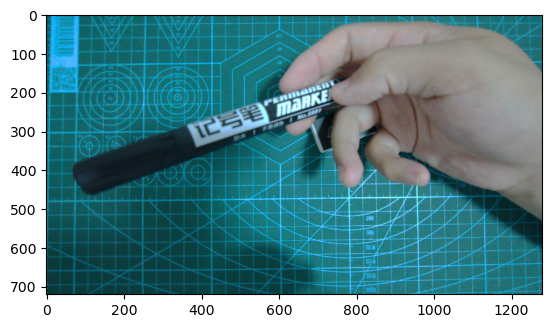

In [4]:
img = cv2.imread("data/marker_pen_01.png")
plt.imshow(img[:, :, ::-1])

## 模型预测


0: 640x1088 1 marker_pen, 37.5ms
Speed: 6.2ms preprocess, 37.5ms inference, 2.0ms postprocess per image at shape (1, 3, 1088, 1088)


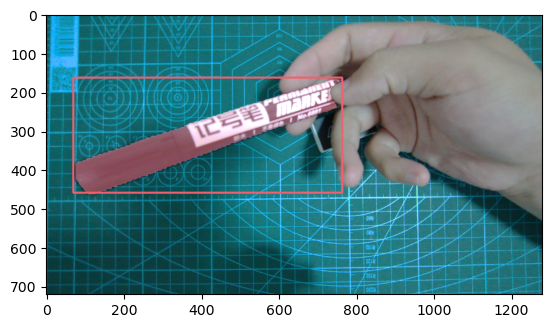

In [5]:
result = model.segment(img, draw_mask=True, draw_box=True, draw_label=False)
canvas, class_id_list, obj_mask_list, xyxy_list, conf_list = result 
plt.imshow(canvas[:, :, ::-1])

物体类别ID列表: [0]
ROI区域: [70, 163, 764, 459]
置信度: 0.952


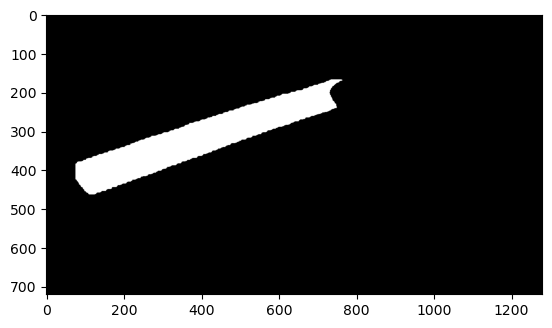

In [6]:
# 物体ID
obj_idx = 0
# 打印结果
print(f"物体类别ID列表: {class_id_list}")
print(f"ROI区域: {xyxy_list[obj_idx]}")
print(f"置信度: {conf_list[obj_idx]:.3f}")
# 显示物体的Mask
mask = obj_mask_list[obj_idx]
plt.imshow(mask, cmap="gray")